In [1]:
## 0 ## : 필요 라이브러리 및 클래스 import
import numpy as np
from PIL import Image
from bldcsag1024 import *

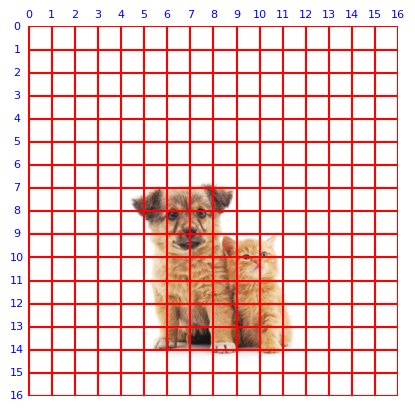

In [2]:
# - device는 SAM과 BLDCSAG768의 device를 다르게 설정해주세요.
SAM_device = 'cuda:5'
BLDCSAG_device = 'cuda:6'

## 1 ## Mask generation을 위한 coord 확인
# - x1 : 왼쪽 위 점의 x좌표
# - y1 : 왼쪽 위 점의 y좌표
# - x2 : 오른쪽 아래 점의 x좌표
# - y2 : 오른쪽 아래 점의 y좌표
# 자동으로 선택되지는 않고, 밑 SamHQImageProcessor에서 coord에 입력해주셔야합니다.
image_grid = ImageGrid('img.png')
image_grid.draw_grid()

In [3]:
## 2 ## : SAM으로 object mask 생성
# - Generation time : 3~7s / GPU Memory Usage : 6500~7500MiB
# - input image를 BLDC 폴더 내에 'img.png'의 이름으로 저장해주세요.
# - image_path 이름 되도록이면 변경하지 말아주세요.
# - coord는 (x1, y1, x2, y2)로 값 순서를 반드시 지켜주세요. (Default: (2,2,14,14))
img_processor = SamHQImageProcessor(img_path="img.png", device = SAM_device, coord=(4,6,12,15))
img_processor.run()

<All keys matched successfully>


In [6]:
## 3 ## : BLDCSAG768로 output image 생성
# - Generation time : 75~85s(w/.SAG), 50~60s(w/o.SAG) / GPU Memory Usage : 8500~9500MiB
# - prompt와 negative_prompt는 자유롭게 변경하면서 사용해주세요.
prompt='Dog and cat are sitting on the central park'
negative_prompt = "low quality, blurry, distorted, out of focus, low resolution, bad anatomy, bad proportions, extra limbs, missing limbs"


# - blending_start_percentage에 따라 blending 과정을 얼마나 빠르게 시작할지 결정됩니다. (Default : 0.1, Recommend : [0.1,0.4])
# - 이외 주석처리된 부분은 참고용 input으로, 실제 input이 아니므로 주석해제하시면 오류 발생합니다.
bld_controlnet = BLDCSAG1024(
    prompt=prompt,
    negative_prompt=negative_prompt,
    # init_image='image.png',
    # mask='mask.png',
    # model_path='stabilityai/stable-diffusion-2-1',
    # controlnet_model_path='thibaud/controlnet-sd21-canny-diffusers',  # ControlNet SD 2.1 Canny model path
    blending_start_percentage = 0.10,
    device = BLDCSAG_device,
    # output_path='output.png'
)


# - kernel_size는 object outline에서 artifact 발견시 크기를 늘려주세요. (Default : 1, Recommend : [1,3])
# - num_inference_steps는 model이 inference 과정에서 진행할 sampling step입니다. (Default : 100, Recommend : [70,150])
# - guidance_scale는 prompt와 negative_prompt를 사용한 CFG Guidance scale 입니다. (Default : 7.0, Recommend : [7.0,7.5])
# - sag_scale은 SAG Guidance scale입니다. (Default : 0.8, Recommend : [0.7,0.9], SAG 미사용 시 0.0으로 설정해주시면 됩니다.)
# - seed는 None일 경우 random한 image가 generation됩니다.
results = bld_controlnet.edit_image(
    kernel_size = 5,            # Default : 1
    num_inference_steps=100,    # Default : 100
    guidance_scale=7.0,         # Default : 7.0
    sag_scale = 0.6,            # Default : 0.8 
    seed = 1020,                # Default : None(random)
)


results_flat = np.concatenate(results, axis=1)
Image.fromarray(results_flat).save(bld_controlnet.output_path)

An error occurred while trying to fetch thibaud/controlnet-sd21-canny-diffusers: thibaud/controlnet-sd21-canny-diffusers does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

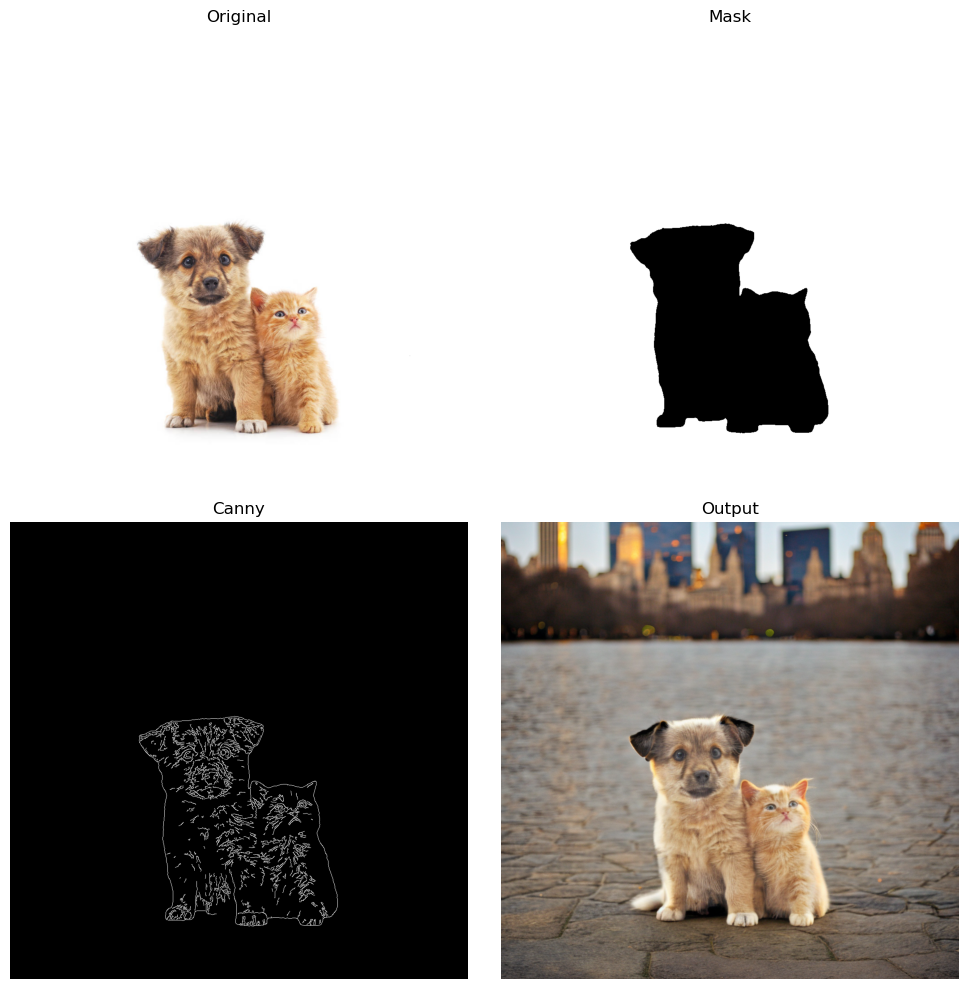

In [7]:
img_display = ImageGridDisplay('img.png', 'mask.png', 'canny.png', 'output.png')
img_display.display()